# 1. (모델링) 환경준비

In [227]:
from matplotlib import pyplot as plt
from datetime import datetime as dt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import random

# Pandas 데이터 프레임에서 float을 소수점 2자리 까지 출력해 준다.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Pandas 데이터 프레임에서 column을 다 출력하도록 설정한다.
pd.set_option('display.max_columns', None)

random.seed(3)

In [228]:
data = pd.read_csv('klpga_train.csv', encoding = 'cp949')

# 2. (모델링) 전처리

In [229]:
######################### 사전 제거 컬럼
data.drop(['rank_str','event_yard', 'birdie', 'pBreak', 'days', 'prize_cumsum_1', 'max_prize',
          'min_prize', 'degree','rank', 'DEA_vrs', 'closeness', 'betweenness','eigenvector', 'birth',
          'prize', 'sixty', 'avgBirdie', 'avgPut', 'prize_cumsum_1_hhi', 'prize_cumsum_1_gini',
              'drivGIR', 'driving', 'avgStrokePerYard', 'iron', 'p4GIR', 'point', 'prize',
          'p3GIR', 'all', 'GIR', 'fieldPut', 'p3Score', 'p5Score', 'p4Score', 'event_par',
          'DEA_crs'], axis = 1, inplace = True)

In [230]:
data.describe()

,event_code,series_code,year,month,event_meter,rookieP,avgStroke,holeInOne,eagle,p3avgBirdie,p4avgBirdie,p5avgBirdie,drivAcc,driveDist,p3Put,p4Put,p5Put,p5GIR,bunkSave,recovery,top10,hit,avgHoleInOne,avgEagle,round,height,age,event_cumsum,prize_cumsum,prize_gini,prize_hhi,career,top1,top2,total_prize,prize_cumsum_gini,prize_cumsum_hhi
count,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000,25460.0000
mean,2016983551.0080,1150126833.3011,2016.9161,6.7901,5988.4397,6.1701,73.4907,0.0065,0.0471,12.5084,12.3252,19.5852,74.5872,240.2943,1.7571,1.7350,1.7243,75.3138,30.8138,54.2967,0.1044,166.2936,0.0020,0.0144,3.3189,166.3802,24.0335,59.1367,18.0955,0.9975,0.1841,9.2923,0.0089,0.0134,20.3151,-0.0049,4.5307
std,3801496.9133,20453.5686,3.8017,2.1232,136.6853,22.3862,2.6715,0.0802,0.2201,10.5496,7.1964,13.2650,12.4321,14.5124,0.1858,0.1244,0.1857,16.1116,37.5353,16.1904,0.3058,68.5148,0.0247,0.0685,0.5452,4.3551,3.6231,50.3333,4.0987,0.0635,0.0649,7.1626,0.0938,0.1151,0.5012,0.0551,133.2760
min,2008040003.0000,1150110002.0000,2008.0000,4.0000,5633.0000,0.0000,64.3333,0.0000,0.0000,0.0000,0.0000,0.0000,14.2900,175.2352,1.0000,1.2000,1.0000,12.5000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,2.0000,150.0000,15.0466,1.0000,0.0001,0.4743,0.0000,0.0000,0.0000,0.0000,12.6115,-1.3333,0.0000
25%,2014090002.0000,1150120101.0000,2014.0000,5.0000,5905.0000,0.0000,71.6667,0.0000,0.0000,0.0000,6.6667,12.5000,67.3100,231.0000,1.6250,1.6500,1.6250,62.5000,0.0000,43.7500,0.0000,115.0000,0.0000,0.0000,3.0000,163.0000,21.2986,19.0000,17.5319,0.9634,0.1300,3.0000,0.0000,0.0000,20.0301,-0.0282,0.0000
50%,2017040003.0000,1150120121.0000,2017.0000,6.0000,5996.0000,0.0000,73.3333,0.0000,0.0000,12.5000,10.0000,16.6667,76.1900,240.2500,1.7500,1.7333,1.7500,75.0000,0.0000,54.5455,0.0000,162.0000,0.0000,0.0000,3.0000,166.0000,23.4411,45.0000,19.0038,0.9902,0.1900,8.0000,0.0000,0.0000,20.3666,-0.0034,0.0300
75%,2020070025.0000,1150129206.0000,2020.0000,9.0000,6086.0000,0.0000,75.0000,0.0000,0.0000,18.7500,16.6667,25.0000,83.3300,249.7500,1.8750,1.8000,1.8571,87.5000,50.0000,65.5172,0.0000,213.0000,0.0000,0.0000,4.0000,170.0000,26.1952,86.0000,20.1636,1.0428,0.2300,15.0000,0.0000,0.0000,20.5001,0.0204,0.1600
max,2023060002.0000,1150210001.0000,2023.0000,11.0000,6269.0000,310.0000,91.0000,1.0000,2.0000,75.0000,53.3333,100.0000,100.0000,304.0000,4.6250,3.0526,5.6250,100.0000,100.0000,100.0000,1.0000,437.0000,0.5000,0.6667,4.0000,184.0000,55.9151,272.0000,22.3322,1.1988,0.3400,29.0000,1.0000,1.0000,21.8219,0.2750,10000.0000


In [231]:
data['name'] = data['name'].astype(str)
data['event_name'] = data['event_name'].astype(str)
data['event_code'] = data['event_code'].astype(str)
data['series_code'] = data['series_code'].astype(str)
data['sponsor'] = data['sponsor'].astype(str)

In [232]:
# IQR outlier 제거 함수
def get_outlier(df = None, column = None, weight = 1.5):
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)

    IQR = Q3 - Q1
    IQR_weight = IQR * weight

    lowest = Q1 - IQR_weight
    highest = Q3 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    
    return outlier_idx

In [154]:
'''
# 변수 중 수치형 데이터
NUMVlists = []

for col in data.columns:
    if type(data[col][0]) != type('문자열'):
        NUMVlists.append(col)
        
# 아래 변수 세개는 IQR 이상치제거에서 데이터를 너무 많이  
NUMVlists.remove('series_code')
NUMVlists.remove('event_code')
NUMVlists.remove('rookieP')
NUMVlists.remove('top10')
NUMVlists.remove('top1')
NUMVlists.remove('top2')
NUMVlists.remove('eagle')
NUMVlists.remove('prize_cumsum_gini')
NUMVlists.remove('prize_cumsum_hhi')
'''

"\n# 변수 중 수치형 데이터\nNUMVlists = []\n\nfor col in data.columns:\n    if type(data[col][0]) != type('문자열'):\n        NUMVlists.append(col)\n        \n# 아래 변수 세개는 IQR 이상치제거에서 데이터를 너무 많이  \nNUMVlists.remove('series_code')\nNUMVlists.remove('event_code')\nNUMVlists.remove('rookieP')\nNUMVlists.remove('top10')\nNUMVlists.remove('top1')\nNUMVlists.remove('top2')\nNUMVlists.remove('eagle')\nNUMVlists.remove('prize_cumsum_gini')\nNUMVlists.remove('prize_cumsum_hhi')\n"

In [155]:
'''
# IQR 이상치 제거 코드
for NUMVlist in NUMVlists:
    print(NUMVlist)
    outlier_idx = get_outlier(df = data, column = NUMVlist, weight = 3) 
    print(len(outlier_idx))
    data.drop(outlier_idx, axis=0, inplace=True)
'''

'\n# IQR 이상치 제거 코드\nfor NUMVlist in NUMVlists:\n    print(NUMVlist)\n    outlier_idx = get_outlier(df = data, column = NUMVlist, weight = 3) \n    print(len(outlier_idx))\n    data.drop(outlier_idx, axis=0, inplace=True)\n'

C:\Users\H&CONSULTING\AppData\Local\Temp\ipykernel_17860\185965861.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(data['top10'],


Skewness(왜도): 2.587661
Kurtosis(첨도): 4.696357


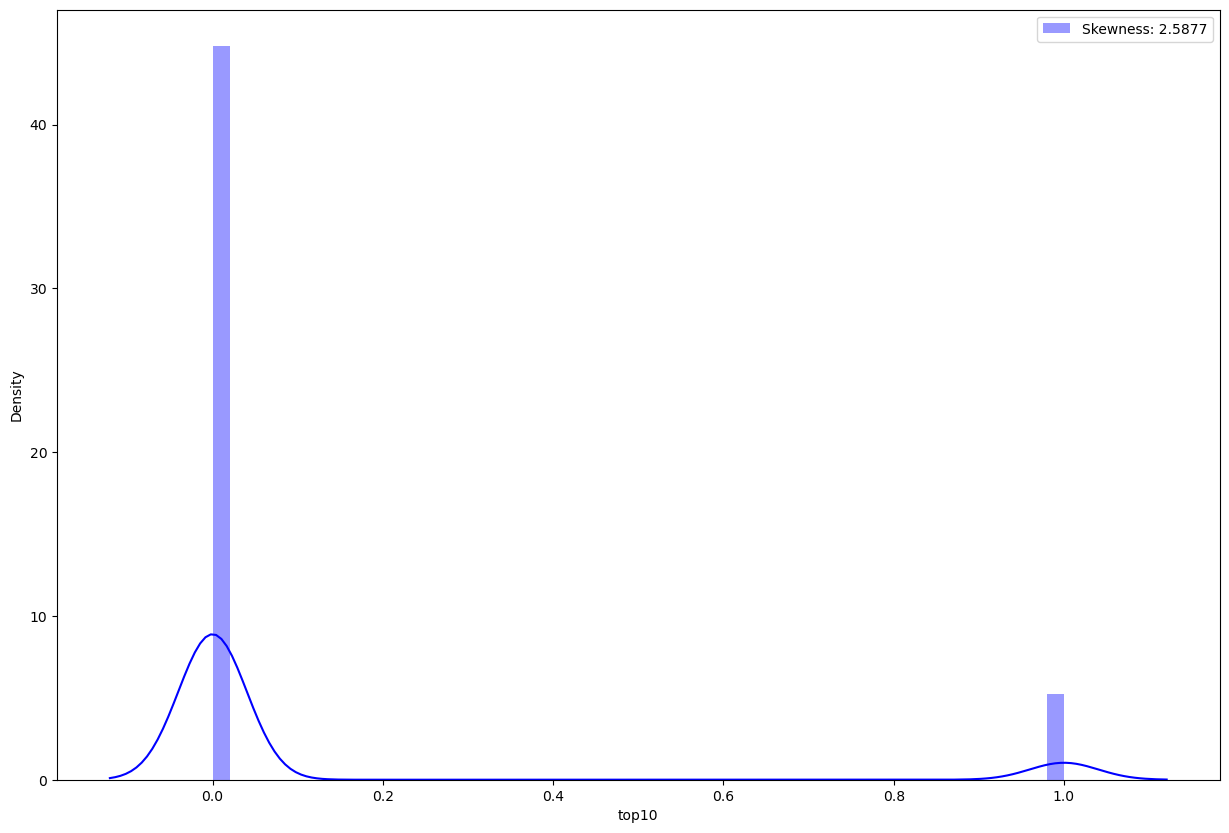

In [233]:
# top10 왜도 첨도 확인
plt.figure(figsize=(15,10))

graph = sns.distplot(data['top10'],
                    color = 'b',
                    label = 'Skewness: %.4f' %data['top10'].skew())

graph = graph.legend(loc = 'best')

print('Skewness(왜도): %f' %data['top10'].skew())
print('Kurtosis(첨도): %f' %data['top10'].kurt())

In [234]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data['year'] = pd.to_datetime(data['year'], format = '%Y')
data['month'] = pd.to_datetime(data['month'], format = '%m')

In [235]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [236]:
data = data.sort_values(by = ['date'], axis = 0, ascending = True)
data.drop(['year', 'month'], axis = 1, inplace = True)
data.index = data['date']
data.drop('date', axis = 1, inplace = True)

In [237]:
data.columns

Index(['name', 'event_code', 'series_code', 'event_name', 'event_meter',
       'rookieP', 'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie',
       'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put',
       'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10', 'hit',
       'avgHoleInOne', 'avgEagle', 'round', 'height', 'sponsor', 'age',
       'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career',
       'top1', 'top2', 'total_prize', 'prize_cumsum_gini', 'prize_cumsum_hhi'],
      dtype='object')

# t-1 적용

In [238]:
df1 = data.sort_values(['name', 'date'])#.reset_index()
df2 = df1.copy()
cols = ['event_name', 'event_code', 'series_code', 'sponsor',
       'event_meter', 'rookieP', 'avgStroke', 'holeInOne', 'eagle',
       'p3avgBirdie', 'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist',
       'p3Put', 'p4Put', 'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10',
       'hit', 'avgHoleInOne', 'avgEagle', 'round', 'height', 'age',
       'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career',
       'top1', 'top2', 'total_prize', 'prize_cumsum_gini', 'prize_cumsum_hhi']
       #'DEA_crs']

In [239]:
df1.shape #(25460, 39)

(25460, 38)

In [240]:
# t시점의 대회 데이터
CompetCols = ['event_code','series_code', 
    'event_name', 'event_meter','round', 'event_cumsum', 'prize_cumsum','prize_gini','prize_hhi',
    'total_prize']

# (t-1) 시점의 선수 데이터
PlayerCols = ['sponsor',
    'rookieP', 'avgStroke', 'holeInOne', 'eagle',
    'p3avgBirdie', 'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist',
    'p3Put', 'p4Put', 'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10',
    'hit', 'avgHoleInOne', 'avgEagle', 'height', 'age', 'career', 'top1', 'top2',
'prize_cumsum_gini', 'prize_cumsum_hhi']#, 'DEA_crs']

# 종속변수인 t시점에서의 top10 여부
DVColdata = df1['top10']

In [241]:
len(cols)

37

In [242]:
#직전 이벤트의 특징
for col in PlayerCols:
    df1[col] = df2.groupby('name')[col].shift()

In [243]:
df1.rename(columns = {'top1' : 'top1Rec'}, inplace = True)
df1.rename(columns = {'top2' : 'top2Rec'}, inplace = True)
df1.rename(columns = {'top10' : 'top10Rec'}, inplace = True)

In [244]:
df2.rename(columns = {'top1' : 'top1Rec'}, inplace = True)
df2.rename(columns = {'top2' : 'top2Rec'}, inplace = True)
df2.rename(columns = {'top10' : 'top10Rec'}, inplace = True)

In [245]:
# t시점의 대회 데이터
CompetCols = ['event_code','series_code', 
    'event_name', 'event_meter','round', 'event_cumsum', 'prize_cumsum','prize_gini','prize_hhi',
    'total_prize']

# (t-1) 시점의 선수 데이터
PlayerCols = ['sponsor',
    'rookieP', 'avgStroke', 'holeInOne', 'eagle',
    'p3avgBirdie', 'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist',
    'p3Put', 'p4Put', 'p5Put', 'p5GIR', 'bunkSave', 'recovery', 
    'hit', 'avgHoleInOne', 'avgEagle', 'height', 'age', 'career', 
'prize_cumsum_gini', 'prize_cumsum_hhi',
'top1Rec', 'top2Rec', 'top10Rec']#, 'DEA_crs']

In [246]:
df1['top10'] = DVColdata

In [247]:
df1.isnull().sum()

name                   0
event_code             0
series_code            0
event_name             0
event_meter            0
rookieP              680
avgStroke            680
holeInOne            680
eagle                680
p3avgBirdie          680
p4avgBirdie          680
p5avgBirdie          680
drivAcc              680
driveDist            680
p3Put                680
p4Put                680
p5Put                680
p5GIR                680
bunkSave             680
recovery             680
top10Rec             680
hit                  680
avgHoleInOne         680
avgEagle             680
round                  0
height               680
sponsor              680
age                  680
event_cumsum           0
prize_cumsum           0
prize_gini             0
prize_hhi              0
career               680
top1Rec              680
top2Rec              680
total_prize            0
prize_cumsum_gini    680
prize_cumsum_hhi     680
top10                  0
dtype: int64

In [248]:
df1.dropna(axis = 0, inplace = True)

In [249]:
df1.isnull().sum()

name                 0
event_code           0
series_code          0
event_name           0
event_meter          0
rookieP              0
avgStroke            0
holeInOne            0
eagle                0
p3avgBirdie          0
p4avgBirdie          0
p5avgBirdie          0
drivAcc              0
driveDist            0
p3Put                0
p4Put                0
p5Put                0
p5GIR                0
bunkSave             0
recovery             0
top10Rec             0
hit                  0
avgHoleInOne         0
avgEagle             0
round                0
height               0
sponsor              0
age                  0
event_cumsum         0
prize_cumsum         0
prize_gini           0
prize_hhi            0
career               0
top1Rec              0
top2Rec              0
total_prize          0
prize_cumsum_gini    0
prize_cumsum_hhi     0
top10                0
dtype: int64

# Object Type
name : 이름
event_name : 대회명
series_code : 시리즈 코드 (연도별 차이 X) [시리즈 대분류]
event_code : 이벤트 코드 (연도별 차이 O) [시리즈 소분류]
sponsor : 스폰서

top1 : 우승 여부
top2 : 준우승 여부
top10 : top10 해당 여부

In [250]:
data = df1

In [251]:
data['top10Rec'] = data['top10Rec'].astype(str)
data['top1Rec'] = data['top1Rec'].astype(str)
data['top2Rec'] = data['top2Rec'].astype(str)

In [252]:
# 명목변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

# 선수명
name_encoder = LabelEncoder()
name_encoder.fit(data['name'])
labels = name_encoder.transform(data['name'])
data['name'] = labels

# 시리즈 코드
series_encoder = LabelEncoder()
series_encoder.fit(data['series_code'])
labels = series_encoder.transform(data['series_code'])
data['series_code'] = labels

# 이벤트 코드
event_encoder = LabelEncoder()
event_encoder.fit(data['event_code'])
labels = event_encoder.transform(data['event_code'])
data['event_code'] = labels


# 스폰서명
sponsor_encoder = LabelEncoder()
sponsor_encoder.fit(data['sponsor'])
labels = sponsor_encoder.transform(data['sponsor'])
data['sponsor'] = labels

# top1 해당
top1Rec_encoder = LabelEncoder()
top1Rec_encoder.fit(data['top1Rec'])
labels = top1Rec_encoder.transform(data['top1Rec'])
data['top1Rec'] = labels


# top 2 해당
top2Rec_encoder = LabelEncoder()
top2Rec_encoder.fit(data['top2Rec'])
labels = top2Rec_encoder.transform(data['top2Rec'])
data['top2Rec'] = labels


# top 10 해당
top10Rec_encoder = LabelEncoder()
top10Rec_encoder.fit(data['top10Rec'])
labels = top10Rec_encoder.transform(data['top10Rec'])
data['top10Rec'] = labels
    

In [253]:
print(name_encoder.classes_)
print(series_encoder.classes_)
print(event_encoder.classes_)
print(sponsor_encoder.classes_)
print(top1Rec_encoder.classes_)
print(top2Rec_encoder.classes_)
print(top10Rec_encoder.classes_)

['CHEN Yu Ju' 'Haru Nomura' 'LI Shuying' '강가율' '강다나' '강다나2' '강미혜' '강민주'
 '강소율' '강수연' '강수은' '강예린' '강은비' '강지선' '강지원' '강채연' '강현서' '강혜은' '고나래' '고나혜'
 '고민정' '고지우' '고지원' '고진영' '공미정' '곽보미' '구래현' '구옥희' '권다원' '권서연' '권영미' '금나은'
 '김가영' '김가윤' '김가희' '김경분' '김규리' '김규리2' '김규빈' '김나리' '김나영' '김나현2' '김다나' '김다은'
 '김다은2' '김도연' '김도연2' '김도희' '김동희' '김란경' '김리안' '김민기' '김민별' '김민선' '김민선2'
 '김민선7' '김민정' '김민주' '김민지5' '김민지6' '김보경' '김보령' '김보미' '김보미3' '김보배' '김보배2'
 '김보아' '김빛나' '김상희' '김새로미' '김서영' '김서윤2' '김선미' '김세민' '김세연' '김세영' '김세영2'
 '김세은' '김소라' '김소영2' '김소이' '김소정' '김소진' '김소희2' '김송연' '김수민2' '김수빈' '김수연'
 '김수지' '김순희' '김스텔라' '김슬기2' '김시원' '김아로미' '김아름' '김아림' '김아현' '김연송' '김연희'
 '김예진' '김우정' '김유리나' '김유빈' '김윤교' '김윤설' '김율' '김은정' '김은진' '김은희' '김이나' '김인경'
 '김자영2' '김재희' '김정수2' '김정연' '김주미' '김지수' '김지영2' '김지원' '김지윤' '김지은' '김지현'
 '김지현2' '김지희' '김진주' '김찬미' '김채영' '김초연' '김초희' '김태경' '김태영' '김하늘' '김하니' '김해림'
 '김현경' '김현명' '김현수' '김현지' '김혜민' '김혜윤' '김혜윤2' '김혜정' '김혜지' '김혜진3' '김효문' '김효주'
 '김효진' '김희망' '김희정' '김희준' '김희지' '나다예' '나예진' '나희원' '남민지' '남소연' '남

In [254]:
data = data.sort_values(by = 'date', ascending = True)
#data.drop('DEA_crs', axis = 1, inplace = True)

# 3. (모델링) ML - 12개

In [255]:
# 종속변수 TOP10
def load_data(data):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    
    scaler = MinMaxScaler()
    
    X = data.copy()
    y = X.pop('top10')
    
    scaled_data = scaler.fit_transform(data.select_dtypes(exclude=["object", "category"]))
    df_scaled = pd.DataFrame(data=scaled_data, columns=data.select_dtypes(exclude=['object', 'category']).columns)
    X = df_scaled.copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2, #19,824
                                                      shuffle = False)
    return X_train, X_test, y_train, y_test

In [256]:
data['name'][:19824].nunique()

527

In [183]:
X_train, X_test, y_train, y_test = load_data(data)
print(len(X_train))
print(len(y_test))
#y_.head()

19824
4956


In [147]:
y_test.head(50)

date
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    1
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    1
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    1
2021-05-16    0
2021-05-16    0
2021-05-16    1
2021-05-16    1
2021-05-16    1
2021-05-16    1
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    1
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
2021-05-16    0
Name: top10, dtype: int64

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
# NB
NB = MultinomialNB().fit(X_train, y_train)
y_predicted = NB.predict(X_test)
print(' \n confusion_matrix (Naive Bayesian) \n ')
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print('----------------')
print('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# DT
DT = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predicted= DT.predict(X_test)
print (' \n confusion_matrix (Decision Tree) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SGD
SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted = SGD.predict(X_test)
print (' \n confusion_matrix (SGD) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SVM
SVM = LinearSVC().fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
print (' \n confusion_matrix (SVM)\n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# RF
RFA = RandomForestClassifier(n_estimators=10)
RFA.fit(X_train, y_train)
y_predicted = RFA.predict(X_test)
print (' \n confusion_matrix (RandomForest) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LR
Logi = LogisticRegression()
Logi.fit(X_train, y_train)
y_predicted = Logi.predict(X_test)
print (' \n confusion_matrix (Logistic Regression) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

#248/4,956

 
 confusion_matrix (Naive Bayesian) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

 
 confusion_matrix (Decision Tree) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

 
 confusion_matrix (SGD) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    reca

In [87]:
# adaBoost
model_cand = AdaBoostClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (AdaBoost) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# GBM
model_cand = GradientBoostingClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (GBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LightGBM
model_cand = LGBMClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (LightGBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# elasticnet
model_cand = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (ElasticNet) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (AdaBoost) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

 
 confusion_matrix (GBM) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

 
 confusion_matrix (LightGBM) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-scor

C:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [88]:
# KNN
model_cand = KNeighborsClassifier(n_neighbors = 10)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (KNN) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# XGB
model_cand = XGBClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (XGB) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (KNN) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956

 
 confusion_matrix (XGB) 
 
[[4455    0]
 [   0  501]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4455
           1       1.00      1.00      1.00       501

    accuracy                           1.00      4956
   macro avg       1.00      1.00      1.00      4956
weighted avg       1.00      1.00      1.00      4956



# 4. (실전테스트) ML - SVM (~2022까지 학습)

In [184]:
SVM = LinearSVC(C = 0.06, random_state = 1).fit(X_train, y_train)
pr = SVM.predict(X_test)
pr.sum()

494

384개-> 1/4

In [90]:
print(pr)

[0 0 0 ... 1 0 0]


In [187]:
data.columns

Index(['name', 'event_code', 'series_code', 'event_name', 'event_meter',
       'rookieP', 'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie',
       'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put',
       'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10Rec', 'hit',
       'avgHoleInOne', 'avgEagle', 'round', 'height', 'sponsor', 'age',
       'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career',
       'top1Rec', 'top2Rec', 'total_prize', 'prize_cumsum_gini',
       'prize_cumsum_hhi', 'top10'],
      dtype='object')

In [92]:
#data2 = pd.read_csv('klpga_test.csv', encoding = 'cp949')

In [188]:
data2 = df1
data2 = data2.sort_values(by = 'date', ascending = True)
data2.head()

,name,event_code,series_code,event_name,event_meter,rookieP,avgStroke,holeInOne,eagle,p3avgBirdie,p4avgBirdie,p5avgBirdie,drivAcc,driveDist,p3Put,p4Put,p5Put,p5GIR,bunkSave,recovery,top10Rec,hit,avgHoleInOne,avgEagle,round,height,sponsor,age,event_cumsum,prize_cumsum,prize_gini,prize_hhi,career,top1Rec,top2Rec,total_prize,prize_cumsum_gini,prize_cumsum_hhi,top10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-04-20,478,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,73.0000,0.0000,0.0000,8.3333,16.6667,8.3333,78.5700,238.6667,1.7500,1.7000,1.8333,75.0000,0.0000,50.0000,0,145.0000,0.0000,0.0000,3,165.0000,0,19.1342,3,15.5784,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,415,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,78.5000,0.0000,0.0000,0.0000,5.0000,12.5000,82.1400,252.5000,1.7500,1.8000,1.6250,50.0000,0.0000,38.8889,0,152.0000,0.0000,0.0000,3,162.0000,0,30.4521,2,14.4756,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,327,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,77.5000,0.0000,0.0000,12.5000,15.0000,0.0000,75.0000,231.7500,1.8750,1.8500,2.0000,62.5000,0.0000,23.0769,0,234.0000,0.0000,0.0000,3,167.0000,0,26.2110,2,14.2210,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,324,0,3,2008 우리투자증권 레이디스 챔피언십,5786,5.0000,77.3333,0.0000,0.0000,8.3333,3.3333,8.3333,78.5700,233.3333,1.9167,1.8276,2.0833,91.6667,0.0000,52.6316,0,195.0000,0.0000,0.0000,3,161.0000,0,18.4904,2,14.6287,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,518,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,73.6667,0.0000,0.0000,33.3333,3.3333,25.0000,83.3300,264.8333,1.7500,1.9667,1.8333,75.0000,0.0000,20.0000,0,38.0000,0.0000,0.0000,3,176.0000,0,25.5288,3,15.3961,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0


In [95]:
data2 = data2.iloc[23704:,]
data2.head()

,name,event_code,series_code,event_name,event_meter,rookieP,avgStroke,holeInOne,eagle,p3avgBirdie,p4avgBirdie,p5avgBirdie,drivAcc,driveDist,p3Put,p4Put,p5Put,p5GIR,bunkSave,recovery,top10Rec,hit,avgHoleInOne,avgEagle,round,height,sponsor,age,event_cumsum,prize_cumsum,prize_gini,prize_hhi,career,top1Rec,top2Rec,total_prize,prize_cumsum_gini,prize_cumsum_hhi,top10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-04-09,386,274,16,롯데렌터카 여자오픈,5847,0.0000,71.0000,0.0000,1.0000,25.0000,20.0000,25.0000,85.7100,227.9139,1.7500,1.6667,2.2500,50.0000,0.0000,25.0000,0,93.0000,0.0000,0.2500,4,174.0000,42,21.5479,38,18.8561,1.0050,0.2800,2.0000,0,0,20.5001,-0.0533,0.1200,0
2023-04-09,300,274,16,롯데렌터카 여자오픈,5847,0.0000,71.0000,0.0000,0.0000,16.6667,20.0000,8.3333,83.3300,243.8990,1.4167,1.7000,1.8333,75.0000,0.0000,61.5385,1,87.0000,0.0000,0.0000,4,160.0000,10,35.2274,46,19.9767,1.0050,0.2800,25.0000,0,0,20.5001,0.0009,0.1400,1
2023-04-09,445,274,16,롯데렌터카 여자오픈,5847,0.0000,73.5000,0.0000,0.0000,0.0000,10.0000,0.0000,78.5700,242.5403,2.0000,1.7000,2.0000,100.0000,33.3333,44.4444,0,74.0000,0.0000,0.0000,4,173.0000,17,25.6274,134,20.3978,1.0050,0.2800,17.0000,0,0,20.5001,-0.0179,0.0100,0
2023-04-09,554,274,16,롯데렌터카 여자오픈,5847,0.0000,74.6667,0.0000,0.0000,8.3333,6.6667,16.6667,85.7100,234.7358,1.7500,1.5667,1.6667,75.0000,20.0000,62.9630,0,158.0000,0.0000,0.0000,4,164.0000,1,27.5068,167,20.7768,1.0050,0.2800,28.0000,0,0,20.5001,0.0009,0.1400,0
2023-04-09,163,274,16,롯데렌터카 여자오픈,5847,139.0000,71.0000,0.0000,0.0000,0.0000,26.6667,8.3333,85.7100,250.9052,1.8333,1.6000,1.9167,83.3333,0.0000,66.6667,1,48.0000,0.0000,0.0000,4,164.0000,32,23.1452,43,19.6748,1.0050,0.2800,28.0000,0,0,20.5001,0.0009,0.1400,0


In [189]:
data2

,name,event_code,series_code,event_name,event_meter,rookieP,avgStroke,holeInOne,eagle,p3avgBirdie,p4avgBirdie,p5avgBirdie,drivAcc,driveDist,p3Put,p4Put,p5Put,p5GIR,bunkSave,recovery,top10Rec,hit,avgHoleInOne,avgEagle,round,height,sponsor,age,event_cumsum,prize_cumsum,prize_gini,prize_hhi,career,top1Rec,top2Rec,total_prize,prize_cumsum_gini,prize_cumsum_hhi,top10
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-04-20,478,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,73.0000,0.0000,0.0000,8.3333,16.6667,8.3333,78.5700,238.6667,1.7500,1.7000,1.8333,75.0000,0.0000,50.0000,0,145.0000,0.0000,0.0000,3,165.0000,0,19.1342,3,15.5784,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,415,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,78.5000,0.0000,0.0000,0.0000,5.0000,12.5000,82.1400,252.5000,1.7500,1.8000,1.6250,50.0000,0.0000,38.8889,0,152.0000,0.0000,0.0000,3,162.0000,0,30.4521,2,14.4756,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,327,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,77.5000,0.0000,0.0000,12.5000,15.0000,0.0000,75.0000,231.7500,1.8750,1.8500,2.0000,62.5000,0.0000,23.0769,0,234.0000,0.0000,0.0000,3,167.0000,0,26.2110,2,14.2210,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,324,0,3,2008 우리투자증권 레이디스 챔피언십,5786,5.0000,77.3333,0.0000,0.0000,8.3333,3.3333,8.3333,78.5700,233.3333,1.9167,1.8276,2.0833,91.6667,0.0000,52.6316,0,195.0000,0.0000,0.0000,3,161.0000,0,18.4904,2,14.6287,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
2008-04-20,518,0,3,2008 우리투자증권 레이디스 챔피언십,5786,0.0000,73.6667,0.0000,0.0000,33.3333,3.3333,25.0000,83.3300,264.8333,1.7500,1.9667,1.8333,75.0000,0.0000,20.0000,0,38.0000,0.0000,0.0000,3,176.0000,0,25.5288,3,15.3961,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11,187,282,36,셀트리온 퀸즈 마스터즈,6106,0.0000,73.5000,0.0000,0.0000,12.5000,5.0000,12.5000,92.8600,226.1183,1.7500,1.5263,1.6250,75.0000,66.6667,72.2222,0,244.0000,0.0000,0.0000,3,171.0000,45,22.3671,40,17.6444,0.9502,0.3000,8.0000,0,0,20.9056,0.0716,0.0000,0
2023-06-11,541,282,36,셀트리온 퀸즈 마스터즈,6106,0.0000,73.5000,0.0000,0.0000,50.0000,0.0000,25.0000,78.5700,233.9530,1.2500,1.6000,1.7500,87.5000,20.0000,52.9412,0,232.0000,0.0000,0.0000,3,170.0000,15,30.1699,151,20.5478,0.9502,0.3000,9.0000,0,0,20.9056,0.0716,0.0000,0
2023-06-11,539,282,36,셀트리온 퀸즈 마스터즈,6106,0.0000,70.2500,0.0000,0.0000,12.5000,10.0000,43.7500,64.2900,246.8691,1.8750,1.6000,1.5333,87.5000,100.0000,83.3333,0,153.0000,0.0000,0.0000,3,165.0000,32,20.3973,30,18.2524,0.9502,0.3000,8.0000,0,0,20.9056,0.0716,0.0000,0


In [190]:
data3 = data2.pop('top10')
data5 = data2.pop('event_name')

In [191]:
data3

date
2008-04-20    0
2008-04-20    0
2008-04-20    0
2008-04-20    0
2008-04-20    0
             ..
2023-06-11    0
2023-06-11    0
2023-06-11    0
2023-06-11    1
2023-06-11    0
Name: top10, Length: 24780, dtype: int64

In [192]:
data4 = data3.copy()

In [100]:
'''
data2 = data2.sort_values(by = ['date'], axis = 0, ascending = False)
data2 = data2.loc[:,['name', 'event_code', 'series_code', 'event_name', 'event_meter',
       'rookieP', 'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie',
       'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put',
       'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10', 'hit',
       'avgHoleInOne', 'avgEagle', 'round', 'height', 'sponsor', 'age',
       'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career',
       'top1', 'top2', 'total_prize', 'prize_cumsum_gini',
       'prize_cumsum_hhi', 'DEA_crs']]
data2.dropna(inplace=True)
data2.shape #(1095, 37)
'''

"\ndata2 = data2.sort_values(by = ['date'], axis = 0, ascending = False)\ndata2 = data2.loc[:,['name', 'event_code', 'series_code', 'event_name', 'event_meter',\n       'rookieP', 'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie',\n       'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put',\n       'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10', 'hit',\n       'avgHoleInOne', 'avgEagle', 'round', 'height', 'sponsor', 'age',\n       'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career',\n       'top1', 'top2', 'total_prize', 'prize_cumsum_gini',\n       'prize_cumsum_hhi', 'DEA_crs']]\ndata2.dropna(inplace=True)\ndata2.shape #(1095, 37)\n"

In [193]:
data2

,name,event_code,series_code,event_meter,rookieP,avgStroke,holeInOne,eagle,p3avgBirdie,p4avgBirdie,p5avgBirdie,drivAcc,driveDist,p3Put,p4Put,p5Put,p5GIR,bunkSave,recovery,top10Rec,hit,avgHoleInOne,avgEagle,round,height,sponsor,age,event_cumsum,prize_cumsum,prize_gini,prize_hhi,career,top1Rec,top2Rec,total_prize,prize_cumsum_gini,prize_cumsum_hhi
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-04-20,478,0,3,5786,0.0000,73.0000,0.0000,0.0000,8.3333,16.6667,8.3333,78.5700,238.6667,1.7500,1.7000,1.8333,75.0000,0.0000,50.0000,0,145.0000,0.0000,0.0000,3,165.0000,0,19.1342,3,15.5784,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000
2008-04-20,415,0,3,5786,0.0000,78.5000,0.0000,0.0000,0.0000,5.0000,12.5000,82.1400,252.5000,1.7500,1.8000,1.6250,50.0000,0.0000,38.8889,0,152.0000,0.0000,0.0000,3,162.0000,0,30.4521,2,14.4756,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000
2008-04-20,327,0,3,5786,0.0000,77.5000,0.0000,0.0000,12.5000,15.0000,0.0000,75.0000,231.7500,1.8750,1.8500,2.0000,62.5000,0.0000,23.0769,0,234.0000,0.0000,0.0000,3,167.0000,0,26.2110,2,14.2210,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000
2008-04-20,324,0,3,5786,5.0000,77.3333,0.0000,0.0000,8.3333,3.3333,8.3333,78.5700,233.3333,1.9167,1.8276,2.0833,91.6667,0.0000,52.6316,0,195.0000,0.0000,0.0000,3,161.0000,0,18.4904,2,14.6287,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000
2008-04-20,518,0,3,5786,0.0000,73.6667,0.0000,0.0000,33.3333,3.3333,25.0000,83.3300,264.8333,1.7500,1.9667,1.8333,75.0000,0.0000,20.0000,0,38.0000,0.0000,0.0000,3,176.0000,0,25.5288,3,15.3961,0.9462,0.1300,0.0000,0,0,19.5193,0.0541,0.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11,187,282,36,6106,0.0000,73.5000,0.0000,0.0000,12.5000,5.0000,12.5000,92.8600,226.1183,1.7500,1.5263,1.6250,75.0000,66.6667,72.2222,0,244.0000,0.0000,0.0000,3,171.0000,45,22.3671,40,17.6444,0.9502,0.3000,8.0000,0,0,20.9056,0.0716,0.0000
2023-06-11,541,282,36,6106,0.0000,73.5000,0.0000,0.0000,50.0000,0.0000,25.0000,78.5700,233.9530,1.2500,1.6000,1.7500,87.5000,20.0000,52.9412,0,232.0000,0.0000,0.0000,3,170.0000,15,30.1699,151,20.5478,0.9502,0.3000,9.0000,0,0,20.9056,0.0716,0.0000
2023-06-11,539,282,36,6106,0.0000,70.2500,0.0000,0.0000,12.5000,10.0000,43.7500,64.2900,246.8691,1.8750,1.6000,1.5333,87.5000,100.0000,83.3333,0,153.0000,0.0000,0.0000,3,165.0000,32,20.3973,30,18.2524,0.9502,0.3000,8.0000,0,0,20.9056,0.0716,0.0000


In [285]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
    
scaler = MinMaxScaler()
    
scaled_data = scaler.fit_transform(data2.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=data2.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [288]:
X_train.drop('top10', axis = 1, inplace = True)

In [289]:
X.columns

Index(['name', 'event_code', 'series_code', 'event_meter', 'rookieP',
       'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie', 'p4avgBirdie',
       'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put', 'p5Put',
       'p5GIR', 'bunkSave', 'recovery', 'top10Rec', 'hit', 'avgHoleInOne',
       'avgEagle', 'round', 'height', 'sponsor', 'age', 'event_cumsum',
       'prize_cumsum', 'prize_gini', 'prize_hhi', 'career', 'top1Rec',
       'top2Rec', 'total_prize', 'prize_cumsum_gini', 'prize_cumsum_hhi'],
      dtype='object')

In [291]:
SVM = LinearSVC(C = 0.018, random_state = 1).fit(X_train, y_train)
pred = SVM.predict(X)
pred.sum()

0

In [282]:
data3.sum()

2624

In [283]:
pred.sum()

NameError: name 'pred' is not defined

In [74]:
datum = data2

In [75]:
datum.drop(['event_meter', 'rookieP',
       'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie', 'p4avgBirdie',
       'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put', 'p5Put',
       'p5GIR', 'bunkSave', 'recovery', 'top10Rec', 'hit', 'avgHoleInOne',
       'avgEagle', 'round', 'height', 'sponsor', 'age', 'event_cumsum',
       'prize_cumsum', 'prize_gini', 'prize_hhi', 'career', 'top1Rec',
       'top2Rec', 'total_prize', 'prize_cumsum_gini', 'prize_cumsum_hhi',
       'DEA_crs'], axis = 1, inplace = True)

KeyError: "['event_meter', 'rookieP', 'avgStroke', 'holeInOne', 'eagle', 'p3avgBirdie', 'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put', 'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'top10Rec', 'hit', 'avgHoleInOne', 'avgEagle', 'round', 'height', 'sponsor', 'age', 'event_cumsum', 'prize_cumsum', 'prize_gini', 'prize_hhi', 'career', 'top1Rec', 'top2Rec', 'total_prize', 'prize_cumsum_gini', 'prize_cumsum_hhi', 'DEA_crs'] not found in axis"

In [ ]:
datum['event_name'] = data5

In [ ]:
datum['pred'] = pred

In [ ]:
datum['real'] = data4

In [77]:
datum

,name,event_code,series_code,event_name,pred,real
date,,,,,,
2023-04-09,386,274,16,롯데렌터카 여자오픈,0,0
2023-04-09,300,274,16,롯데렌터카 여자오픈,0,1
2023-04-09,445,274,16,롯데렌터카 여자오픈,0,0
2023-04-09,554,274,16,롯데렌터카 여자오픈,0,0
2023-04-09,163,274,16,롯데렌터카 여자오픈,1,0
...,...,...,...,...,...,...
2023-06-11,187,282,36,셀트리온 퀸즈 마스터즈,0,0
2023-06-11,541,282,36,셀트리온 퀸즈 마스터즈,0,0
2023-06-11,539,282,36,셀트리온 퀸즈 마스터즈,0,0


In [78]:
dataDecode = datum.copy()
'''
name_encoder
series_encoder
event_encoder
'''

'\nname_encoder\nseries_encoder\nevent_encoder\n'

In [79]:
dataDecode['name'] = name_encoder.inverse_transform(dataDecode['name'])
dataDecode['event_code'] = event_encoder.inverse_transform(dataDecode['event_code'])
dataDecode['series_code'] = series_encoder.inverse_transform(dataDecode['series_code'])

In [80]:
dataDecode.drop(['event_code', 'series_code'], axis = 1, inplace = True)

In [81]:
dataDecode.to_excel('KLPGA_Prediction_clf_V4.xlsx', encoding = 'utf-8')

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [82]:
dataDecode['pred'].sum()

87

In [83]:
dataDecode['real'].sum()

96

In [1398]:
dataDecode['event_name'].unique()

array(['롯데렌터카 여자오픈', '메디힐 · 한국일보 챔피언십', '넥센 · 세인트나인 마스터즈 2023',
       '크리스에프앤씨 제45회 KLPGA 챔피언십', '제9회 교촌 1991 레이디스 오픈',
       '2023 NH투자증권 레이디스 챔피언십', '제11회 E1 채리티 오픈', '롯데 오픈', '셀트리온 퀸즈 마스터즈'],
      dtype=object)

In [1401]:
mdata = pd.read_csv('klpga_test.csv', encoding = 'cp949')

C:\Users\H&CONSULTING\AppData\Local\Temp\ipykernel_16480\459142325.py:1: DtypeWarning: Columns (0,3,5,6,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  mdata = pd.read_csv('klpga_test.csv', encoding = 'cp949')


In [1402]:
mdata.groupby('event_name')['avgStroke'].mean()

event_name
2023 NH투자증권 레이디스 챔피언십     72.0755
넥센 · 세인트나인 마스터즈 2023      73.8494
롯데 오픈                     72.5933
롯데렌터카 여자오픈                75.8186
메디힐 · 한국일보 챔피언십           73.3509
셀트리온 퀸즈 마스터즈              72.7123
제11회 E1 채리티 오픈            73.4538
제9회 교촌 1991 레이디스 오픈       74.1597
크리스에프앤씨 제45회 KLPGA 챔피언십   73.4390
Name: avgStroke, dtype: float64

In [865]:
data2['event_name'].unique()

array(['셀트리온 퀸즈 마스터즈', '롯데 오픈', '제11회 E1 채리티 오픈', '2023 NH투자증권 레이디스 챔피언십',
       '제9회 교촌 1991 레이디스 오픈', '크리스에프앤씨 제45회 KLPGA 챔피언십',
       '넥센 · 세인트나인 마스터즈 2023', '메디힐 · 한국일보 챔피언십', '롯데렌터카 여자오픈'],
      dtype=object)

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=data2.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [254]:
# SVC 하이퍼파라미터
'''
C : 제약조건의 강도를 설정
max_iter : 최대반복 횟수를 지정
class_weight : 학습의 분량을 조절
multi_class : 3개 이상을 분류
random_state 
'''

model = LinearSVC(C = 0.006, random_state = 1).fit(X_train, y_train)

model
Prediction = model.predict(X)
'''
- Prediction은 1095개
- 선수 1095 행 중 TOP 10은 100~120개 정도여야 맞음
- 초기(C=1)에 Prediction은 TOP 10을 307행 예측
- C = 0.1에 Prediction은 TOP 10을 269행 예측
- C = 0.05에 Prediction은 TOP 10을 240행 예측
- C = 0.01에 Prediction은 TOP 10을 165행 예측
'''
Prediction.sum()

111

In [247]:
X.columns

Index(['event_meter', 'rookieP', 'holeInOne', 'eagle', 'p3avgBirdie',
       'p4avgBirdie', 'p5avgBirdie', 'drivAcc', 'driveDist', 'p3Put', 'p4Put',
       'p5Put', 'p5GIR', 'bunkSave', 'recovery', 'hit', 'avgHoleInOne',
       'avgEagle', 'round', 'height', 'age', 'event_cumsum', 'prize_cumsum_1',
       'prize_gini', 'prize_hhi', 'career', 'total_prize', 'prize_cumsum_gini',
       'prize_cumsum_hhi', 'DEA_crs'],
      dtype='object')

In [248]:
data2['Pred'] = Prediction
data2 = data2.loc[:,['name', 'event_name', 'Pred']]
data2 = data2.sort_index(ascending = True)
data2.head()

,name,event_name,Pred
0,LI Shuying,롯데렌터카 여자오픈,0
1,강채연,롯데렌터카 여자오픈,0
2,고지우,롯데렌터카 여자오픈,0
3,고지원,롯데렌터카 여자오픈,0
4,곽보미,롯데렌터카 여자오픈,0


In [1089]:
df1['top10']

date
2020-06-28    0
2020-07-05    0
2020-07-13    0
2017-09-03    0
2023-04-16    0
             ..
2023-05-07    1
2023-05-14    0
2023-05-28    0
2023-06-04    0
2023-06-11    0
Name: top10, Length: 24780, dtype: int64

In [251]:
data2['Real'] = data2['Real'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        1095 non-null   object
 1   event_name  1095 non-null   object
 2   Pred        1095 non-null   int64 
 3   Real        1095 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 38.5+ KB


# 6. 파일화

In [252]:
data2 = data2.sort_values(by = ['event_name'] , axis = 0, ascending = True)

In [253]:
data2.to_excel('KLPGA_Prediction_clf_V2.xlsx', encoding = 'utf-8')

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
